# Exploratory Data Analysis


## 1. Setup and Data Loading


In [47]:
# Import necessary librarie
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


In [15]:
# Load the dataset
data = pd.read_json("data/energy_features_dataset.jsonl", lines=True)

## 2. Dataset Overview


In [18]:
# Display basic dataset information
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8457 entries, 0 to 8456
Data columns (total 40 columns):
 #   Column                           Non-Null Count  Dtype         
---  ------                           --------------  -----         
 0   prompt                           8457 non-null   object        
 1   model                            8457 non-null   object        
 2   timestamp                        8457 non-null   datetime64[ns]
 3   duration                         8457 non-null   float64       
 4   time_to_first_token              8457 non-null   float64       
 5   prompt_tokens                    8457 non-null   int64         
 6   completion_tokens                8457 non-null   int64         
 7   total_tokens                     8457 non-null   int64         
 8   tokens_per_second                8457 non-null   float64       
 9   energy_consumed_wh               8457 non-null   float64       
 10  response                         8457 non-null   object     

In [19]:
# Display dataset shape
data.shape


(8457, 40)

In [20]:
# Display summary statistics
data.describe()


,timestamp,duration,time_to_first_token,prompt_tokens,completion_tokens,total_tokens,tokens_per_second,energy_consumed_wh,syntactic_tree_depth,clause_count,...,sentiment_intensity,information_density,avg_sentence_length_prompt,abstract_thinking_density,problem_solving_density,communication_density,emotional_psychological_density,decision_making_density,time_change_density,semantic_category_diversity
count,8457,8457.000000,8457.000000,8457.000000,8457.000000,8457.000000,8457.000000,8457.000000,8457.000000,8457.000000,...,8457.000000,8457.000000,8457.000000,8457.000000,8457.000000,8457.000000,8457.000000,8457.000000,8457.000000,8457.0
mean,2025-10-20 13:29:54.378739456,1.388868,1.383861,82.129360,45.072721,127.202081,158.406243,0.019319,5.599976,6.653778,...,0.093666,0.407456,13.490881,0.009138,0.020022,0.032421,0.005519,0.015290,0.017630,1.0
min,2025-10-19 20:18:09,0.270000,0.271000,8.000000,1.000000,14.000000,1.400000,0.000100,1.000000,0.000000,...,0.000000,0.000000,1.493750,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.0
25%,2025-10-20 08:45:22,0.660000,0.657000,21.000000,50.000000,68.000000,55.400000,0.004400,3.000000,1.000000,...,0.000000,0.333333,7.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.0
50%,2025-10-20 14:55:17,1.020000,1.015000,44.000000,50.000000,92.000000,91.700000,0.007200,5.000000,2.000000,...,0.040000,0.407407,11.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.0
75%,2025-10-20 20:52:25,1.370000,1.372000,79.000000,50.000000,124.000000,209.700000,0.014000,7.000000,6.000000,...,0.153000,0.500000,16.000000,0.000000,0.022989,0.045455,0.000000,0.015873,0.022059,1.0
max,2025-10-21 01:52:52,298.840000,298.836000,1463.000000,50.000000,1513.000000,2900.400000,2.110800,46.000000,102.000000,...,0.752000,1.000000,468.000000,0.400000,0.500000,0.600000,0.222222,0.285714,0.333333,1.0
std,NaN,3.695095,3.680289,115.890151,12.178652,115.245811,184.926995,0.060804,2.962029,11.782744,...,0.121737,0.128578,13.720033,0.027047,0.040734,0.053953,0.019790,0.033062,0.035372,0.0


In [21]:
# Display first few rows
data.head()


,prompt,model,timestamp,duration,time_to_first_token,prompt_tokens,completion_tokens,total_tokens,tokens_per_second,energy_consumed_wh,...,sentiment_intensity,information_density,avg_sentence_length_prompt,abstract_thinking_density,problem_solving_density,communication_density,emotional_psychological_density,decision_making_density,time_change_density,semantic_category_diversity
0,how can identity protection services help prot...,gpt-4o-mini-2024-07-18,2025-10-19 20:18:09,2.03,2.029,18,50,68,33.5,0.0150,...,0.371,0.636364,11.0,0.090909,0.000000,0.0,0.0,0.000000,0.0,1
1,how can identity protection services help prot...,llama-3.1-8b-instant,2025-10-19 20:18:16,0.43,0.427,46,50,96,224.5,0.0062,...,0.371,0.636364,11.0,0.090909,0.000000,0.0,0.0,0.000000,0.0,1
2,how can identity protection services help prot...,mistral-large-latest,2025-10-19 20:18:24,1.44,1.435,14,50,64,44.5,0.0096,...,0.371,0.636364,11.0,0.090909,0.000000,0.0,0.0,0.000000,0.0,1
3,Beside OFAC's selective sanction that target t...,gpt-4o-mini-2024-07-18,2025-10-19 20:22:13,1.34,1.337,52,50,102,76.3,0.0113,...,0.180,0.461538,16.5,0.000000,0.090909,0.0,0.0,0.090909,0.0,1
4,Beside OFAC's selective sanction that target t...,llama-3.1-8b-instant,2025-10-19 20:22:18,0.45,0.447,80,50,130,290.3,0.0019,...,0.180,0.461538,16.5,0.000000,0.090909,0.0,0.0,0.090909,0.0,1


## 3. Energy Consumption Analysis


In [22]:
# Analyze energy consumption distribution
data["energy_consumed_wh"].describe()


count    8457.000000
mean        0.019319
std         0.060804
min         0.000100
25%         0.004400
50%         0.007200
75%         0.014000
max         2.110800
Name: energy_consumed_wh, dtype: float64

In [23]:
# Compare average energy consumption by model
data.groupby("model")["energy_consumed_wh"].mean()


model
gpt-4o-mini-2024-07-18    0.021018
llama-3.1-8b-instant      0.009417
mistral-large-latest      0.027520
Name: energy_consumed_wh, dtype: float64

In [24]:
# Compare processing speed across models
data.groupby("model")["tokens_per_second"].mean()


model
gpt-4o-mini-2024-07-18    117.708375
llama-3.1-8b-instant      277.894785
mistral-large-latest       79.629078
Name: tokens_per_second, dtype: float64

In [25]:
# Correlate energy consumption with total tokens
data[["energy_consumed_wh", "total_tokens"]].corr()


,energy_consumed_wh,total_tokens
energy_consumed_wh,1.000000,-0.010492
total_tokens,-0.010492,1.000000


In [26]:
# Identify models with highest energy variability
data.groupby("model")["energy_consumed_wh"].std()


model
gpt-4o-mini-2024-07-18    0.055174
llama-3.1-8b-instant      0.027898
mistral-large-latest      0.084273
Name: energy_consumed_wh, dtype: float64

## 4. Text Complexity Features Analysis


In [27]:
# Correlation between syntactic complexity features and energy consumption
data[["energy_consumed_wh", "syntactic_tree_depth", "clause_count", "flesch_kincaid_grade", "gunning_fog_index", "smog_index"]].corr()


,energy_consumed_wh,syntactic_tree_depth,clause_count,flesch_kincaid_grade,gunning_fog_index,smog_index
energy_consumed_wh,1.000000,0.005191,0.002738,-0.009359,-0.002344,-0.004870
syntactic_tree_depth,0.005191,1.000000,0.552941,0.483408,0.500431,0.561784
clause_count,0.002738,0.552941,1.000000,0.361604,0.347687,0.368758
flesch_kincaid_grade,-0.009359,0.483408,0.361604,1.000000,0.910504,0.784658
gunning_fog_index,-0.002344,0.500431,0.347687,0.910504,1.000000,0.878158
smog_index,-0.004870,0.561784,0.368758,0.784658,0.878158,1.000000


In [28]:
# Average energy consumption by syntactic tree depth
data.groupby("syntactic_tree_depth")["energy_consumed_wh"].mean()


syntactic_tree_depth
1     0.020480
2     0.021866
3     0.017997
4     0.019363
5     0.017498
6     0.020251
7     0.016617
8     0.019802
9     0.018386
10    0.020234
11    0.012471
12    0.039102
13    0.040671
14    0.017927
15    0.011018
16    0.013650
17    0.048717
18    0.005144
19    0.002467
28    0.018433
32    0.004233
46    0.006400
Name: energy_consumed_wh, dtype: float64

In [29]:
# Average energy consumption by clause count
data.groupby("clause_count")["energy_consumed_wh"].mean()


clause_count
0      0.020655
1      0.021367
2      0.016404
3      0.018460
4      0.018724
         ...   
75     0.038800
86     0.008833
87     0.010467
92     0.011183
102    0.005233
Name: energy_consumed_wh, Length: 78, dtype: float64

In [30]:
# Compare readability scores with average energy usage
data.groupby(pd.cut(data["flesch_kincaid_grade"], bins=5))["energy_consumed_wh"].mean()


C:\Users\evanm\AppData\Local\Temp\ipykernel_25640\1662004820.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  data.groupby(pd.cut(data["flesch_kincaid_grade"], bins=5))["energy_consumed_wh"].mean()


flesch_kincaid_grade
(-2.612, 35.001]     0.019351
(35.001, 72.427]     0.014789
(72.427, 109.853]    0.016450
(109.853, 147.28]         NaN
(147.28, 184.706]    0.003933
Name: energy_consumed_wh, dtype: float64

## 5. Lexical Features Analysis


In [31]:
# Correlation between lexical features and energy consumption
data[["energy_consumed_wh", "avg_word_frequency", "lexical_diversity", "vocabulary_richness"]].corr()


,energy_consumed_wh,avg_word_frequency,lexical_diversity,vocabulary_richness
energy_consumed_wh,1.000000,-0.004454,0.006692,0.006376
avg_word_frequency,-0.004454,1.000000,0.025399,-0.216429
lexical_diversity,0.006692,0.025399,1.000000,-0.754767
vocabulary_richness,0.006376,-0.216429,-0.754767,1.000000


In [32]:
# Average energy consumption by word frequency range
data.groupby(pd.qcut(data["avg_word_frequency"], q=5))["energy_consumed_wh"].mean()


C:\Users\evanm\AppData\Local\Temp\ipykernel_25640\4007728719.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  data.groupby(pd.qcut(data["avg_word_frequency"], q=5))["energy_consumed_wh"].mean()


avg_word_frequency
(-0.001, 0.00329]     0.020590
(0.00329, 0.00539]    0.019160
(0.00539, 0.007]      0.020775
(0.007, 0.00872]      0.017052
(0.00872, 0.0231]     0.019014
Name: energy_consumed_wh, dtype: float64

In [33]:
# Average energy consumption by lexical diversity range
data.groupby(pd.qcut(data["lexical_diversity"], q=5))["energy_consumed_wh"].mean()


C:\Users\evanm\AppData\Local\Temp\ipykernel_25640\1182798824.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  data.groupby(pd.qcut(data["lexical_diversity"], q=5))["energy_consumed_wh"].mean()


lexical_diversity
(2.04, 2.828]      0.020076
(2.828, 3.464]     0.017343
(3.464, 4.381]     0.018794
(4.381, 6.021]     0.019711
(6.021, 14.937]    0.020095
Name: energy_consumed_wh, dtype: float64

In [34]:
# Compare vocabulary richness levels with mean energy usage
data.groupby(pd.qcut(data["vocabulary_richness"], q=5))["energy_consumed_wh"].mean()


C:\Users\evanm\AppData\Local\Temp\ipykernel_25640\2468869038.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  data.groupby(pd.qcut(data["vocabulary_richness"], q=5))["energy_consumed_wh"].mean()


vocabulary_richness
(0.3140495, 0.7692307]    0.018137
(0.7692307, 0.9]          0.019143
(0.9, 0.9999998]          0.021413
(0.9999998, 0.9999999]    0.018501
(0.9999999, 1.0]          0.018755
Name: energy_consumed_wh, dtype: float64

## 6. Semantic Features Analysis


In [35]:
# Correlation between semantic features and energy consumption
data[["energy_consumed_wh", "named_entity_density", "semantic_category_diversity"]].corr()


,energy_consumed_wh,named_entity_density,semantic_category_diversity
energy_consumed_wh,1.000000,0.017476,NaN
named_entity_density,0.017476,1.000000,NaN
semantic_category_diversity,NaN,NaN,NaN


In [39]:
# Average energy consumption by named entity density range
data.groupby(pd.qcut(data["named_entity_density"], q=5, duplicates="drop"))["energy_consumed_wh"].mean()


C:\Users\evanm\AppData\Local\Temp\ipykernel_25640\1123328057.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  data.groupby(pd.qcut(data["named_entity_density"], q=5, duplicates="drop"))["energy_consumed_wh"].mean()


named_entity_density
(-0.001, 0.0141]    0.018338
(0.0141, 0.05]      0.018597
(0.05, 0.101]       0.019876
(0.101, 0.429]      0.021477
Name: energy_consumed_wh, dtype: float64

In [37]:
# Average energy consumption by semantic category diversity
data.groupby("semantic_category_diversity")["energy_consumed_wh"].mean()


semantic_category_diversity
1    0.019319
Name: energy_consumed_wh, dtype: float64

In [38]:
# Compare models on semantic features and energy usage
data.groupby("model")[["named_entity_density", "semantic_category_diversity", "energy_consumed_wh"]].mean()


,named_entity_density,semantic_category_diversity,energy_consumed_wh
model,,,
gpt-4o-mini-2024-07-18,0.054535,1.0,0.021018
llama-3.1-8b-instant,0.054528,1.0,0.009417
mistral-large-latest,0.054557,1.0,0.027520


## 7. Sentiment Features Analysis


In [40]:
# Correlation between sentiment features and energy consumption
data[["energy_consumed_wh", "sentiment_polarity", "sentiment_intensity"]].corr()


,energy_consumed_wh,sentiment_polarity,sentiment_intensity
energy_consumed_wh,1.000000,0.008897,-0.001588
sentiment_polarity,0.008897,1.000000,0.295883
sentiment_intensity,-0.001588,0.295883,1.000000


In [41]:
# Average energy consumption by sentiment polarity range
data.groupby(pd.qcut(data["sentiment_polarity"], q=5, duplicates="drop"))["energy_consumed_wh"].mean()


C:\Users\evanm\AppData\Local\Temp\ipykernel_25640\24522618.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  data.groupby(pd.qcut(data["sentiment_polarity"], q=5, duplicates="drop"))["energy_consumed_wh"].mean()


sentiment_polarity
(-1.0, 0.0]       0.019005
(0.0, 0.202]      0.020705
(0.202, 0.542]    0.018434
(0.542, 0.999]    0.020562
Name: energy_consumed_wh, dtype: float64

In [42]:
# Average energy consumption by sentiment intensity range
data.groupby(pd.qcut(data["sentiment_intensity"], q=5, duplicates="drop"))["energy_consumed_wh"].mean()


C:\Users\evanm\AppData\Local\Temp\ipykernel_25640\3142402156.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  data.groupby(pd.qcut(data["sentiment_intensity"], q=5, duplicates="drop"))["energy_consumed_wh"].mean()


sentiment_intensity
(-0.001, 0.009]    0.019790
(0.009, 0.078]     0.019197
(0.078, 0.182]     0.020019
(0.182, 0.752]     0.017785
Name: energy_consumed_wh, dtype: float64

In [43]:
# Compare models on sentiment and energy usage
data.groupby("model")[["sentiment_polarity", "sentiment_intensity", "energy_consumed_wh"]].mean()


,sentiment_polarity,sentiment_intensity,energy_consumed_wh
model,,,
gpt-4o-mini-2024-07-18,0.167820,0.093639,0.021018
llama-3.1-8b-instant,0.168051,0.093696,0.009417
mistral-large-latest,0.167991,0.093662,0.027520


## 8. Topic Keyword Density Analysis


In [44]:
# Correlation between topic keyword densities and energy consumption
topic_cols = [
    "tech_ai_density", "business_finance_density", "health_medical_density",
    "education_learning_density", "science_research_density",
    "social_relationships_density", "entertainment_culture_density",
    "travel_lifestyle_density"
]
data[["energy_consumed_wh"] + topic_cols].corr()


,energy_consumed_wh,tech_ai_density,business_finance_density,health_medical_density,education_learning_density,science_research_density,social_relationships_density,entertainment_culture_density,travel_lifestyle_density
energy_consumed_wh,1.000000,0.010130,-0.005709,-0.002850,-0.001565,0.042907,-0.000460,0.016382,-0.006757
tech_ai_density,0.010130,1.000000,0.105165,0.053296,0.046669,0.192098,0.002303,0.086852,0.233853
business_finance_density,-0.005709,0.105165,1.000000,-0.006630,-0.028352,0.105299,-0.021259,0.052096,0.201357
health_medical_density,-0.002850,0.053296,-0.006630,1.000000,0.011273,0.032120,0.008725,-0.016273,0.101839
education_learning_density,-0.001565,0.046669,-0.028352,0.011273,1.000000,0.157832,0.029331,-0.005241,0.008329
science_research_density,0.042907,0.192098,0.105299,0.032120,0.157832,1.000000,0.053667,0.047992,0.048272
social_relationships_density,-0.000460,0.002303,-0.021259,0.008725,0.029331,0.053667,1.000000,0.011417,-0.004430
entertainment_culture_density,0.016382,0.086852,0.052096,-0.016273,-0.005241,0.047992,0.011417,1.000000,0.078628
travel_lifestyle_density,-0.006757,0.233853,0.201357,0.101839,0.008329,0.048272,-0.004430,0.078628,1.000000


## 9. Concept Density Analysis


In [45]:
# Correlation between concept densities and energy consumption
concept_cols = [
    "abstract_thinking_density", "problem_solving_density", "communication_density",
    "emotional_psychological_density", "decision_making_density", "time_change_density"
]
data[["energy_consumed_wh"] + concept_cols].corr()


,energy_consumed_wh,abstract_thinking_density,problem_solving_density,communication_density,emotional_psychological_density,decision_making_density,time_change_density
energy_consumed_wh,1.000000,-0.000587,-0.003612,0.001195,-0.008410,0.010005,-0.007909
abstract_thinking_density,-0.000587,1.000000,0.137288,0.083049,0.035912,0.076849,0.036402
problem_solving_density,-0.003612,0.137288,1.000000,-0.059192,-0.000930,0.087806,0.107990
communication_density,0.001195,0.083049,-0.059192,1.000000,0.040515,-0.054816,0.045244
emotional_psychological_density,-0.008410,0.035912,-0.000930,0.040515,1.000000,0.036998,0.018864
decision_making_density,0.010005,0.076849,0.087806,-0.054816,0.036998,1.000000,-0.019033
time_change_density,-0.007909,0.036402,0.107990,0.045244,0.018864,-0.019033,1.000000


## 10. Correlation Analysis


In [46]:
# Calculate correlation matrix for numeric features
corr = data.corr(numeric_only=True)


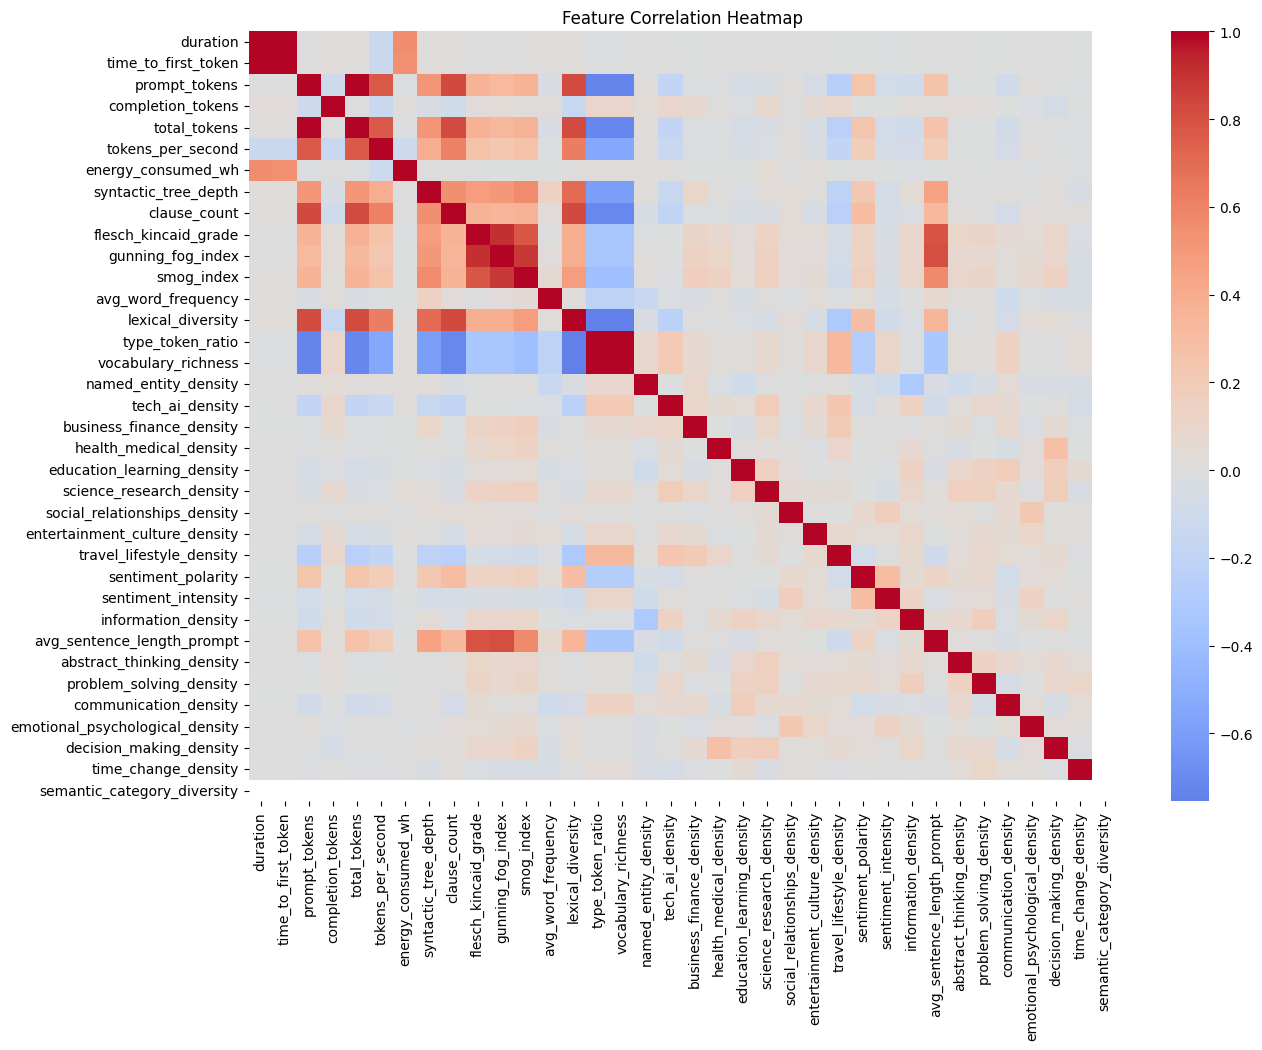

In [48]:
# Visualize full correlation heatmap
plt.figure(figsize=(14, 10))
sns.heatmap(corr, cmap="coolwarm", center=0)
plt.title("Feature Correlation Heatmap")
plt.show()

C:\Users\evanm\AppData\Local\Temp\ipykernel_25640\4097271716.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=energy_corr.values, y=energy_corr.index, palette="coolwarm")


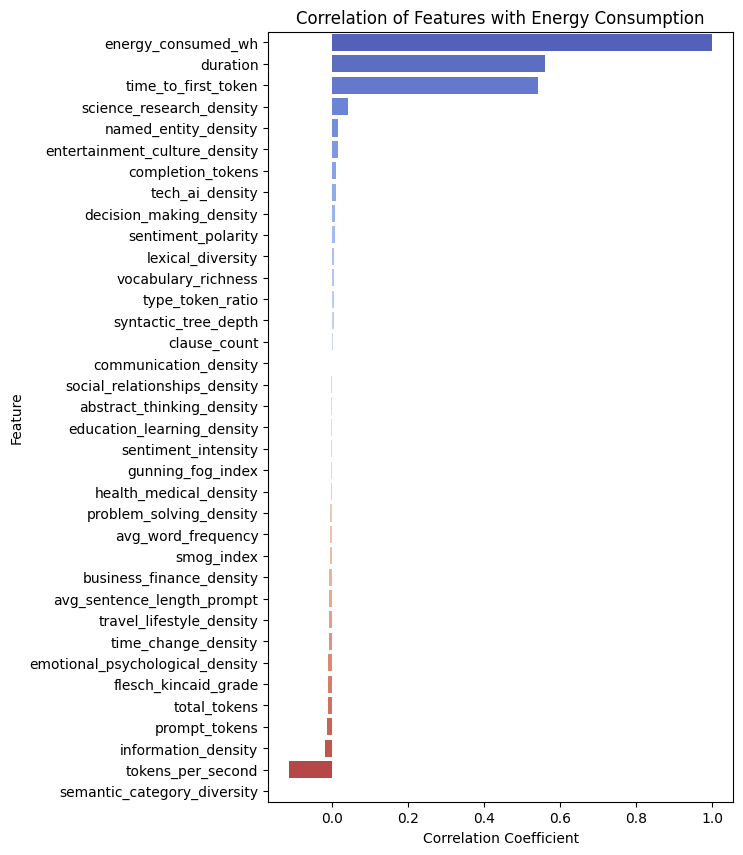

In [49]:
# Visualize correlations specifically with energy consumption
energy_corr = corr["energy_consumed_wh"].sort_values(ascending=False)

plt.figure(figsize=(6, 10))
sns.barplot(x=energy_corr.values, y=energy_corr.index, palette="coolwarm")
plt.title("Correlation of Features with Energy Consumption")
plt.xlabel("Correlation Coefficient")
plt.ylabel("Feature")
plt.show()


## 11. Statistical Summaries


In [56]:
# Summary statistics for key numeric features
data.select_dtypes(include=["number"]).describe()


,duration,time_to_first_token,prompt_tokens,completion_tokens,total_tokens,tokens_per_second,energy_consumed_wh,syntactic_tree_depth,clause_count,flesch_kincaid_grade,...,information_density,avg_sentence_length_prompt,abstract_thinking_density,problem_solving_density,communication_density,emotional_psychological_density,decision_making_density,time_change_density,semantic_category_diversity,energy_per_token
count,8457.000000,8457.000000,8457.000000,8457.000000,8457.000000,8457.000000,8457.000000,8457.000000,8457.000000,8457.000000,...,8457.000000,8457.000000,8457.000000,8457.000000,8457.000000,8457.000000,8457.000000,8457.000000,8457.0,8457.000000
mean,1.388868,1.383861,82.129360,45.072721,127.202081,158.406243,0.019319,5.599976,6.653778,7.766823,...,0.407456,13.490881,0.009138,0.020022,0.032421,0.005519,0.015290,0.017630,1.0,0.000227
std,3.695095,3.680289,115.890151,12.178652,115.245811,184.926995,0.060804,2.962029,11.782744,7.030297,...,0.128578,13.720033,0.027047,0.040734,0.053953,0.019790,0.033062,0.035372,0.0,0.000747
min,0.270000,0.271000,8.000000,1.000000,14.000000,1.400000,0.000100,1.000000,0.000000,-2.425000,...,0.000000,1.493750,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.0,0.000001
25%,0.660000,0.657000,21.000000,50.000000,68.000000,55.400000,0.004400,3.000000,1.000000,3.840000,...,0.333333,7.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.0,0.000037
50%,1.020000,1.015000,44.000000,50.000000,92.000000,91.700000,0.007200,5.000000,2.000000,7.004706,...,0.407407,11.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.0,0.000079
75%,1.370000,1.372000,79.000000,50.000000,124.000000,209.700000,0.014000,7.000000,6.000000,10.240833,...,0.500000,16.000000,0.000000,0.022989,0.045455,0.000000,0.015873,0.022059,1.0,0.000162
max,298.840000,298.836000,1463.000000,50.000000,1513.000000,2900.400000,2.110800,46.000000,102.000000,184.705641,...,1.000000,468.000000,0.400000,0.500000,0.600000,0.222222,0.285714,0.333333,1.0,0.022093


In [51]:
# Model-wise summary statistics for energy consumption and token usage
data.groupby("model")[["energy_consumed_wh", "duration", "tokens_per_second", "total_tokens"]].describe()


energy_consumed_wh                                      \
                                    count      mean       std     min     25%   
model                                                                           
gpt-4o-mini-2024-07-18             2818.0  0.021018  0.055174  0.0013  0.0052   
llama-3.1-8b-instant               2819.0  0.009417  0.027898  0.0014  0.0029   
mistral-large-latest               2820.0  0.027520  0.084273  0.0001  0.0069   

                                               duration            ...  \
                           50%     75%     max    count      mean  ...   
model                                                              ...   
gpt-4o-mini-2024-07-18  0.0076  0.0140  2.1108   2818.0  1.265429  ...   
llama-3.1-8b-instant    0.0041  0.0070  1.2799   2819.0  0.597002  ...   
mistral-large-latest    0.0106  0.0207  1.2893   2820.0  2.303805  ...   

                       tokens_per_second         total_tokens              \
                                     75%     max        count        mean   
model                                                                       
gpt-4o-mini-2024-07-18            106.75  1330.1       2818.0  115.692335   
llama-3.1-8b-instant              296.40  2900.4       2819.0  146.119546   
mistral-large-latest               79.20   843.5       2820.0  119.792908   

                                                                       
                               std   min   25%    50%     75%     max  
model                                                                  
gpt-4o-mini-2024-07-18  110.306570  17.0  66.0   76.0  109.00  1340.0  
llama-3.1-8b-instant    113.882877  46.0  94.0  104.0  140.00  1373.0  
mistral-large-latest    119.043061  14.0  64.0   75.0  111.25  1513.0  

[3 rows x 32 columns]

In [52]:
# Average performance metrics per model
data.groupby("model")[["energy_consumed_wh", "duration", "tokens_per_second", "total_tokens"]].mean()


,energy_consumed_wh,duration,tokens_per_second,total_tokens
model,,,,
gpt-4o-mini-2024-07-18,0.021018,1.265429,117.708375,115.692335
llama-3.1-8b-instant,0.009417,0.597002,277.894785,146.119546
mistral-large-latest,0.027520,2.303805,79.629078,119.792908


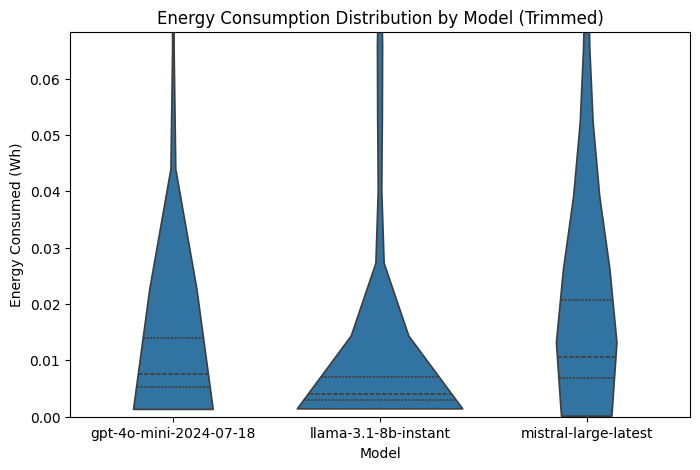

In [58]:
# Visualize model-wise energy consumption distribution
plt.figure(figsize=(8, 5))
sns.violinplot(x="model", y="energy_consumed_wh", data=data, inner="quartile", cut=0)
plt.ylim(0, data["energy_consumed_wh"].quantile(0.95))  # cap at 95th percentile
plt.title("Energy Consumption Distribution by Model (Trimmed)")
plt.xlabel("Model")
plt.ylabel("Energy Consumed (Wh)")
plt.show()


In [54]:
# Compare model efficiency (energy per token)
data["energy_per_token"] = data["energy_consumed_wh"] / data["total_tokens"]
data.groupby("model")["energy_per_token"].mean().sort_values()


model
llama-3.1-8b-instant      0.000085
gpt-4o-mini-2024-07-18    0.000260
mistral-large-latest      0.000335
Name: energy_per_token, dtype: float64

## 12. Key Insights and Patterns


In [62]:
# Identify and document key insights about energy-efficient and energy-intensive prompt characteristics

# Lowest and highest energy-consuming prompts
display("Lowest Energy Prompts")
display(data.nsmallest(10, "energy_consumed_wh")[["prompt", "model", "energy_consumed_wh", "total_tokens"]])

display("Highest Energy Prompts")
display(data.nlargest(10, "energy_consumed_wh")[["prompt", "model", "energy_consumed_wh", "total_tokens"]])

# Compare mean feature values for low vs high energy groups
low_energy_group = data[data["energy_consumed_wh"] <= data["energy_consumed_wh"].quantile(0.25)]
high_energy_group = data[data["energy_consumed_wh"] >= data["energy_consumed_wh"].quantile(0.75)]

energy_feature_comparison = (
    pd.DataFrame({
        "Low Energy Mean": low_energy_group.mean(numeric_only=True),
        "High Energy Mean": high_energy_group.mean(numeric_only=True),
        "Difference": high_energy_group.mean(numeric_only=True) - low_energy_group.mean(numeric_only=True)
    })
    .sort_values("Difference", ascending=False)
)

display("Feature Comparison (Low vs High Energy)")
display(energy_feature_comparison)

# Correlation analysis for energy consumption
energy_corr = data.corr(numeric_only=True)["energy_consumed_wh"].sort_values(ascending=False)
display("Top Positive Correlations with Energy Consumption")
display(energy_corr.head(10))

display("Top Negative Correlations with Energy Consumption")
display(energy_corr.tail(10))


'Lowest Energy Prompts'

,prompt,model,energy_consumed_wh,total_tokens
983,what do you recommend to reduce bags under eyes,mistral-large-latest,0.0001,62
4238,Write an introduction of Fanzhi Pharmacy with ...,mistral-large-latest,0.0001,77
5928,Your task is to evaluate a specific behavior a...,gpt-4o-mini-2024-07-18,0.0013,86
557,"Find a mistake in following sentence: ""They ha...",llama-3.1-8b-instant,0.0014,105
919,Machine learning is great for humanity. It helps,llama-3.1-8b-instant,0.0014,94
1851,Please identify whether Question 1 has the sam...,gpt-4o-mini-2024-07-18,0.0014,59
2541,"Given the document below, you have to determin...",gpt-4o-mini-2024-07-18,0.0014,340
7156,Your task is to evaluate a specific behavior a...,llama-3.1-8b-instant,0.0014,118
96,Please identify whether the sentence answers t...,gpt-4o-mini-2024-07-18,0.0015,113
166,Please continue this story of NAME_2 going to ...,llama-3.1-8b-instant,0.0015,119


'Highest Energy Prompts'

,prompt,model,energy_consumed_wh,total_tokens
327,temperature=0.000000 Question:A 56-year-old ma...,gpt-4o-mini-2024-07-18,2.1108,411
3512,Give me an introduction over 200 words for Sha...,mistral-large-latest,1.2893,82
2191,what is the name of that clock,llama-3.1-8b-instant,1.2799,92
4649,how to start an Oracle database,mistral-large-latest,0.9755,59
5702,Five skills similar to os virtualization. Give...,mistral-large-latest,0.9500,43
7955,Please write the iconic final battle between N...,mistral-large-latest,0.9232,91
8249,Can you have some one upload it now to reposit...,mistral-large-latest,0.8882,67
7985,"In conclusion, please refrain from insulting m...",mistral-large-latest,0.8617,161
7952,Please write an excerpt from an alternate real...,mistral-large-latest,0.8603,98
7829,spacex NAME_30 is not an SSTO is it?,mistral-large-latest,0.8503,68


'Feature Comparison (Low vs High Energy)'

,Low Energy Mean,High Energy Mean,Difference
completion_tokens,40.889803,46.577068,5.687264
duration,0.606095,2.627617,2.021522
time_to_first_token,0.604747,2.611494,2.006748
energy_consumed_wh,0.003125,0.058418,0.055293
type_token_ratio,0.887344,0.894586,0.007241
vocabulary_richness,0.887344,0.894585,0.007241
tech_ai_density,0.050137,0.054345,0.004208
travel_lifestyle_density,0.057176,0.059186,0.002010
science_research_density,0.010802,0.012711,0.001909
sentiment_intensity,0.092399,0.094133,0.001734


'Top Positive Correlations with Energy Consumption'

energy_consumed_wh               1.000000
energy_per_token                 0.868608
duration                         0.559853
time_to_first_token              0.541262
science_research_density         0.042907
named_entity_density             0.017476
entertainment_culture_density    0.016382
completion_tokens                0.010204
tech_ai_density                  0.010130
decision_making_density          0.010005
Name: energy_consumed_wh, dtype: float64

'Top Negative Correlations with Energy Consumption'

avg_sentence_length_prompt        -0.005774
travel_lifestyle_density          -0.006757
time_change_density               -0.007909
emotional_psychological_density   -0.008410
flesch_kincaid_grade              -0.009359
total_tokens                      -0.010492
prompt_tokens                     -0.011506
information_density               -0.018285
tokens_per_second                 -0.111369
semantic_category_diversity             NaN
Name: energy_consumed_wh, dtype: float64